In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

pd.options.display.max_seq_items = 300
#pd.set_option('max_rows', 500)
pd.set_option('max_columns', 300)

## Changing MSSubClass to categorical data

In [2]:
training_data = pd.read_csv('train.csv')

In [64]:
training_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
def make_string(column):
    return str(column)

training_data.MSSubClass = training_data.agg({'MSSubClass': make_string})

In [3]:
training_data.MSSubClass = training_data.MSSubClass.astype(str)

In [ ]:
type(training_data.iloc[1,1])

# Converting all categorical data into dummy variables

- Make dataframe of just numerical inputs
- Concatenate this to a dummy_df data frame
- fill NA values with averages on my full numerical dataset
- Use decision tree

In [4]:
# Extracting all numerical columns and putting them into a data frame: numerical_df
numerical_df = pd.DataFrame() 
for column in training_data:
    val = training_data[column][training_data[column].first_valid_index()]
    if type(val) != str :
        numerical_df = pd.concat([numerical_df,training_data[column]], axis = 1)
        

In [6]:
# Just checking this gives all cateogrical columns
categorical_df = pd.DataFrame() 
for column in training_data:
    if type(training_data[column][training_data[column].first_valid_index()]) == str:
        categorical_df = pd.concat([categorical_df,training_data[column]], axis = 1)

In [7]:
a = len(numerical_df.columns)
b = len(categorical_df.columns)
print('There are {0} numerical columns and {1} categorical. This adds up to {2} and should be 81.'.format(a,b,(a+b)))

There are 37 numerical columns and 44 categorical. This adds up to 81 and should be 81.


In [8]:
dummy_df = pd.DataFrame()
for column in training_data:
    if type(training_data[column][training_data[column].first_valid_index()]) == str:
        dummy = pd.get_dummies(training_data[column])
        dummy_df = pd.concat([dummy_df, dummy], axis = 1)

In [ ]:
# Number of duplicate columns that need renaming
len(dummy_df.columns) - len(set(dummy_df.columns))

## Concatinating numerical columns with dummy columns of categorical data

In [9]:
numerical_train_data = pd.concat([numerical_df, dummy_df], axis = 1)

In [10]:
len(numerical_train_data.columns)

304

In [11]:
len(numerical_train_data.columns) == (len(numerical_df.columns) + len(dummy_df.columns))

True

In [12]:
sum = 0
for null in numerical_train_data.isnull().any():
    sum += null
print(sum)

3


In [13]:
numerical_train_data.isnull().any().sum()

3

In [14]:
for column in numerical_train_data:
    a = numerical_train_data[column].isnull().sum()
    if a.any() > 0:
        print (column, 'has {0} nulls'.format(a))
        

LotFrontage has 259 nulls
MasVnrArea has 8 nulls
GarageYrBlt has 81 nulls


In [15]:
# Dropping Alley, PoolQC, Fence and MiscFeature
numerical_train_data = numerical_train_data.drop(['Alley','PoolQC','Fence','MiscFeature'], axis = 1)

In [16]:
len(numerical_train_data.columns)

304

In [29]:
for column in numerical_train_data:
    a = numerical_train_data[column].isnull().sum()
    if a.any() > 0:
        print(column, 'has {0} nulls.'.format(a))
    del(a)

In [20]:
numerical_train_data['MasVnrArea'].isnull().sum()

0

In [19]:
test = numerical_train_data['MasVnrArea'].fillna(np.mean(numerical_train_data['MasVnrArea']))
numerical_train_data['MasVnrArea'] = test

In [26]:
numerical_train_data['LotFrontage'].isnull().sum()

0

In [24]:
test = numerical_train_data['LotFrontage'].fillna(np.mean(numerical_train_data['LotFrontage']))
numerical_train_data['LotFrontage'] = test

In [28]:
numerical_train_data['GarageYrBlt'].isnull().sum()

0

In [27]:
test = numerical_train_data['GarageYrBlt'].fillna(np.mean(numerical_train_data['GarageYrBlt']))
numerical_train_data['GarageYrBlt'] = test

# Regression Decision Tree Test

In [32]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import tree

In [34]:
X = np.array(numerical_train_data.drop(['SalePrice'], axis = 1))
y = np.array(numerical_train_data['SalePrice'])

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [ ]:
model = DecisionTreeRegressor()
model.fit(X_train,y_train)

In [ ]:
y_actual = y_test
y_pred = model.predict(X_test)

In [ ]:
#plt.scatter(X_train, y_actual, c="k", label="training samples")
plt.scatter(y_actual, y_pred, c="g", label="Decision Tree", linewidth=2)
plt.legend()
plt.show()

In [ ]:
sqrt_mean_squared_error = (mean_squared_error(y_actual,y_pred))**(1/2)
sqrt_mean_squared_error

In [ ]:
model.score(X_test, y_actual)

In [ ]:
model.score(X_train,y_train)

In [ ]:
for x,y in zip(y_actual,y_pred):
    if ((x-y)/y > 1):
        print((x-y)/y)

In [ ]:
with open('house_price_tree.dot', 'w') as f:
    f = tree.export_graphviz(model,
                            out_file = f,
                            feature_names = numerical_train_data.drop(['SalePrice'], axis = 1).columns,
                            class_names = numerical_train_data['SalePrice'],
                            filled = True,
                            rounded = True,
                            special_characters = True)

In [ ]:
len(numerical_train_data.drop(['SalePrice'], axis = 1).columns)

In [ ]:
len(numerical_train_data.columns)

## Decision Tree with min no of sampels set to 10

In [36]:
model_10samples = DecisionTreeRegressor(min_samples_leaf = 10, random_state = 0)
model_10samples.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=0,
           splitter='best')

In [37]:
y_pred_10 = model_10samples.predict(X_test)

In [38]:
y_actual = y_test

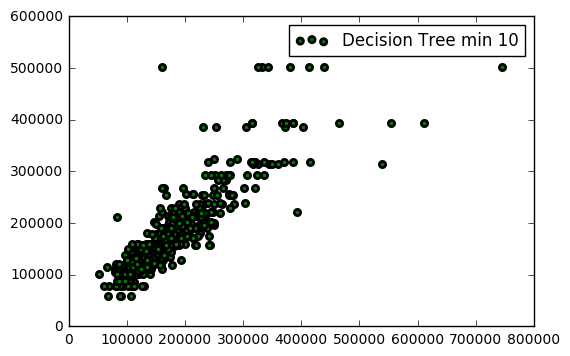

In [39]:
plt.scatter(y_actual, y_pred_10, c='g', label='Decision Tree min 10', linewidth = 2)
plt.legend()
plt.show()

In [40]:
root_mse_10 = (mean_squared_error(y_pred_10, y_actual))**(1/2)
root_mse_10

42225.434773164634

In [41]:
model_10samples.score(X_test,y_actual)

0.72456052139546512

In [42]:
model_10samples.score(X_train,y_train)

0.88808827417043756

In [43]:
with open('House_price_tree2_10.dot', 'w') as f:
    f = tree.export_graphviz(model_10samples,
                            out_file = f,
                            feature_names = numerical_train_data.drop(['SalePrice'], axis = 1).columns,
                            class_names = numerical_train_data['SalePrice'],
                            filled = True,
                            rounded = True,
                            special_characters = True)

Based on Tree, following features appear to be most important
Manually extracted from tree 

- OverallQual
- GrLivingArea
- BSmtFinSF1
- TotalBsmtSF
- 1stFlrSF
- VinylSD
- Garage Area
- Gd
- CollgCr
- Attachd
- LotArea
- YearBuilt
- Y
- LotFrontage
- NAmes
- WoodDeckSF
- GarageCars
- 2ndFlrSF
- HalfBath
- YearRemodAdd
- OpenPorchSF
- BsmtUnfSF
- BedroomAbvGr
- TA
- GarageYrBlt
- RFn


## Comparing important features for 2 different Trees

In [30]:
features = pd.DataFrame()
for a,b in zip((numerical_train_data.drop(['SalePrice'], axis = 1).columns),
               model.feature_importances_):
    features[a] = [b]

NameError: name 'model' is not defined

In [48]:
features_2 = pd.DataFrame()
for a,b in zip((numerical_train_data.drop(['SalePrice'], axis = 1).columns),
               model_10samples.feature_importances_):
    features_2[a] = [b]

In [50]:
features_org = features.transpose()
features_new = features_2.transpose()

In [51]:
# Sorting features to have most important at top. v2 is from tree samples = 10 and v1 was for samples = 1
sorted_features_v1 = features_org.sort_values(0,ascending = False)
sorted_features_v2 = features_new.sort_values(0,ascending = False)

In [ ]:
merged_df = pd.concat([sorted_features_v1, sorted_features_v2], axis = 1)

In [ ]:
merged_df.columns = ['v1','v2']
merged_df.sort_values('v2', ascending = False).head(15)

### Above 15 columns will be used for further analysis

In [56]:
sorted_features_v2.head(15)

,0
OverallQual,0.724229
GrLivArea,0.122992
BsmtFinSF1,0.037257
TotalBsmtSF,0.029892
1stFlrSF,0.013255
GarageArea,0.008458
LotArea,0.007438
YearBuilt,0.005084
YearRemodAdd,0.004601
Attchd,0.004587


In [88]:
Final_data = pd.concat([numerical_train_data[sorted_features_v2.head(15).index],numerical_train_data['SalePrice']], axis = 1)

In [89]:
Final_data.columns

Index(['OverallQual', 'GrLivArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF',
       'GarageArea', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'Attchd',
       'GarageCars', 'WoodDeckSF', '2ndFlrSF', 'OverallCond', 'OpenPorchSF',
       'SalePrice'],
      dtype='object')

In [90]:
Final_data

,OverallQual,GrLivArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,GarageArea,LotArea,YearBuilt,YearRemodAdd,Attchd,GarageCars,WoodDeckSF,2ndFlrSF,OverallCond,OpenPorchSF,SalePrice
0,7,1710,706,856,856,548,8450,2003,2003,1,2,0,854,5,61,208500
1,6,1262,978,1262,1262,460,9600,1976,1976,1,2,298,0,8,0,181500
2,7,1786,486,920,920,608,11250,2001,2002,1,2,0,866,5,42,223500
3,7,1717,216,756,961,642,9550,1915,1970,0,3,0,756,5,35,140000
4,8,2198,655,1145,1145,836,14260,2000,2000,1,3,192,1053,5,84,250000
5,5,1362,732,796,796,480,14115,1993,1995,1,2,40,566,5,30,143000
6,8,1694,1369,1686,1694,636,10084,2004,2005,1,2,255,0,5,57,307000
7,7,2090,859,1107,1107,484,10382,1973,1973,1,2,235,983,6,204,200000
8,7,1774,0,952,1022,468,6120,1931,1950,0,2,90,752,5,0,129900
9,5,1077,851,991,1077,205,7420,1939,1950,1,1,0,0,6,4,118000


In [93]:
Final_data.to_csv('Final_data.csv')

# Gradient Boosted Tree